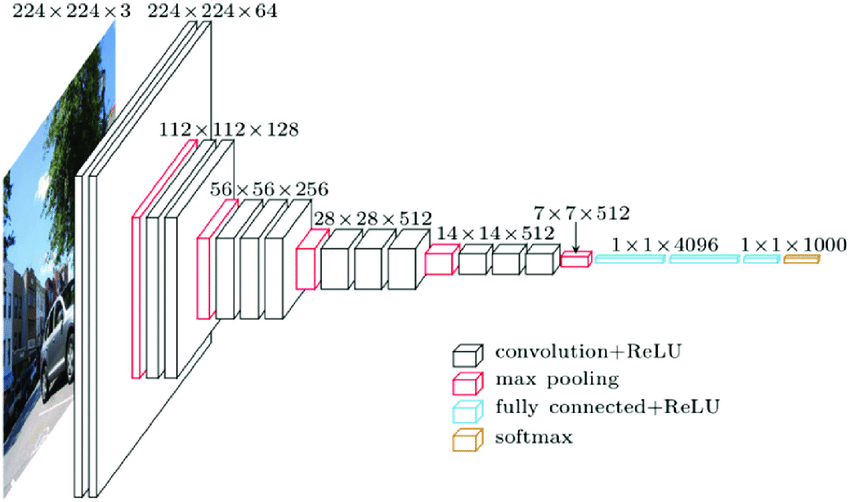

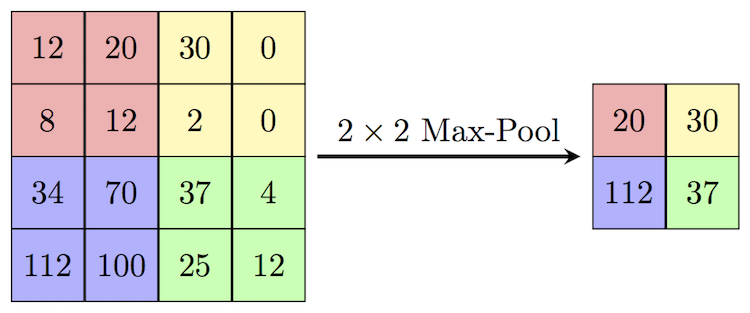

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
import os
import tqdm

import random

from keras.preprocessing.image import load_img
import PIL
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []
for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Cat/52.jpg      0
1  PetImages/Cat/72.jpg      0
2  PetImages/Cat/42.jpg      0
3  PetImages/Cat/75.jpg      0
4  PetImages/Cat/55.jpg      0

In [ ]:
l = list()
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
for i in range(len(l)):
  df = df[df['images'] != l[i]]
len(df)

205

In [ ]:
def myLoadImg(s):
  plt.figure(figsize=(25, 25))
  begin = random.randint(0, len(df[df['label'] == 1]['images']))
  for index, file in enumerate(df[df['label'] == 1]['images'][begin: begin + 25]):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(s)
    plt.axis('off')

In [ ]:
myLoadImg("Dogs")

In [ ]:
myLoadImg("Cats")

In [ ]:
df['label'] = df['label'].astype('str')
df.head(10)

images label
0  PetImages/Cat/52.jpg     0
1  PetImages/Cat/72.jpg     0
2  PetImages/Cat/42.jpg     0
3  PetImages/Cat/75.jpg     0
4  PetImages/Cat/55.jpg     0
5   PetImages/Cat/7.jpg     0
6  PetImages/Dog/56.jpg     1
7  PetImages/Cat/35.jpg     0
8  PetImages/Cat/49.jpg     0
9  PetImages/Cat/79.jpg     0

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=42, test_size=0.2)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

iterator = generator.flow_from_dataframe(
    df_train, 
    x_col='images', 
    y_col='label', 
    target_size=(128, 128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    df_test, 
    x_col='images', 
    y_col='label', 
    target_size=(128, 128), 
    batch_size=512, 
    class_mode='binary'
)

Found 164 validated image filenames belonging to 2 classes.
Found 41 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [ ]:
model.fit(iterator, epochs=15, batch_size=10)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.7515 - accuracy: 0.5183
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.7007 - accuracy: 0.5183
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.6632 - accuracy: 0.5366
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 0.6480 - accuracy: 0.6402
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 0.6509 - accuracy: 0.6220
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 0.6549 - accuracy: 0.6220
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.6246 - accuracy: 0.6890
Epoch 8/15
1/1 [==============================] - 4s 4s/step - loss: 0.6146 - accuracy: 0.5976
Epoch 9/15
1/1 [==============================] - 5s 5s/step - loss: 0.6169 - accuracy: 0.5854
Epoch 10/15
1/1 [==============================] - 4s 4s/step - loss: 0.6290 - accuracy: 0.6463
Epoch 11/15
1/1 [==============================] 

In [ ]:
from keras.applications import vgg16
from keras import layers, models, optimizers

conv_base = vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
 model.fit(iterator, epochs=10, batch_size=10)

Epoch 1/10
1/1 [==============================] - 31s 31s/step - loss: 0.8376 - accuracy: 0.4451
Epoch 2/10
1/1 [==============================] - 34s 34s/step - loss: 1.2129 - accuracy: 0.5244
Epoch 3/10
1/1 [==============================] - 28s 28s/step - loss: 3.0378 - accuracy: 0.4817
Epoch 4/10
1/1 [==============================] - 29s 29s/step - loss: 1.5940 - accuracy: 0.4817
Epoch 5/10
1/1 [==============================] - 28s 28s/step - loss: 0.5506 - accuracy: 0.6829
Epoch 6/10
1/1 [==============================] - 28s 28s/step - loss: 1.1952 - accuracy: 0.5244
Epoch 7/10
1/1 [==============================] - 28s 28s/step - loss: 1.0461 - accuracy: 0.5305
Epoch 8/10
1/1 [==============================] - 28s 28s/step - loss: 0.7281 - accuracy: 0.5732
Epoch 9/10
1/1 [==============================] - 28s 28s/step - loss: 0.5191 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 28s 28s/step - loss: 0.5368 - accuracy: 0.7378
